# Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. Features, Dimensions, and Variables are all referring to the same thing in this notebook. 


#### Main usage of PCA
* Data Visualization
When working on any data related problem, extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables is crucial. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Using dimensionality reduction, data can be projected into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space.


* Speeding Machine Learning Algorithm
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

#### Principal Component
Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

#### PCA on iris dataset
In this section we will decompose with PCA very simple 4-dimensional data set. This is ono eg the best known pattern recognition dataset. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
# loading dataset into Pandas DataFrame
df_iris = pd.read_csv(iris_url ,names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
df_iris.head(15)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In the case that the dimensionality of the data allows it, it is good practice to see how each pair of features correlate with each other. In the followinglink you will find more methods for visualizing multidimensional data using matplotlib and seaborn libraries
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

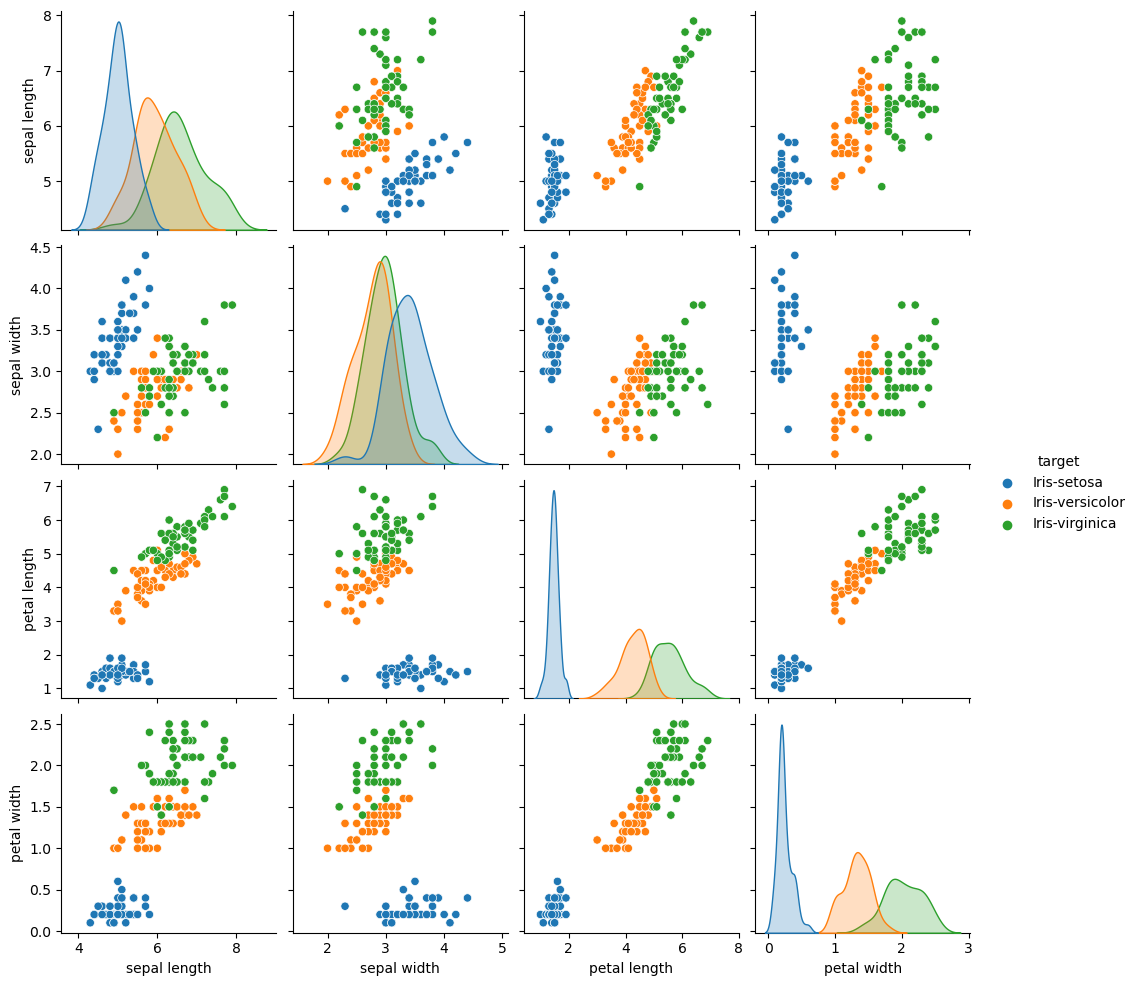

In [6]:
sns.pairplot(df_iris, hue='target')

You can immediately see that the features petal length and petal width are strongly correlated


### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


In [7]:
features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df_iris.loc[:, features_iris].values

In [8]:
y_iris = df_iris.loc[:,['target']].values

In [9]:
x_iris = StandardScaler().fit_transform(x_iris)

In [10]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
5,-0.537178,1.957669,-1.170675,-1.050031,Iris-setosa
6,-1.506521,0.800654,-1.341272,-1.181504,Iris-setosa
7,-1.021849,0.800654,-1.284407,-1.312977,Iris-setosa
8,-1.748856,-0.356361,-1.341272,-1.312977,Iris-setosa
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa


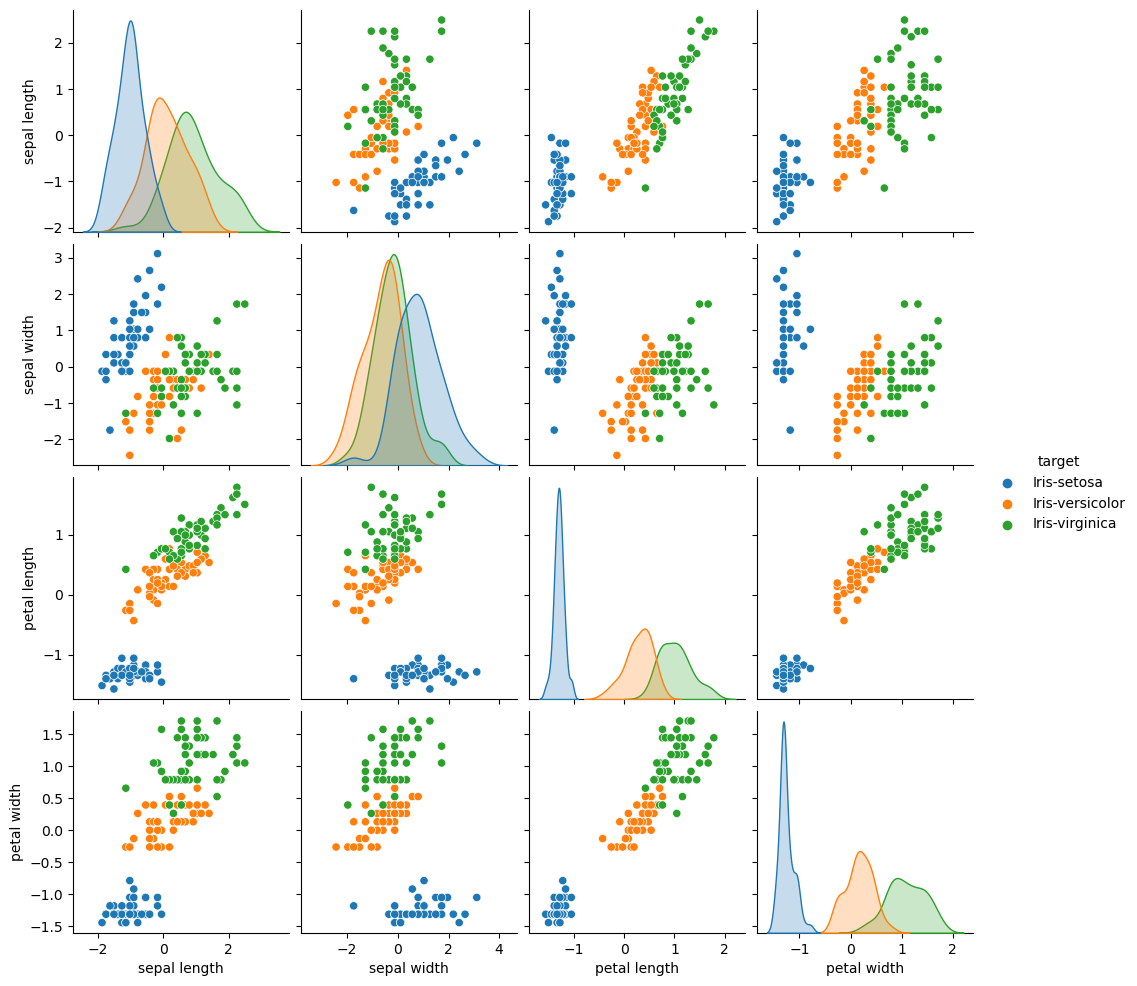

In [11]:
sns.pairplot(df_iris_standarize, hue='target')

We can see that the distributions are now standardized

### PCA Projection to 2D

In [12]:
pca_iris = PCA(n_components=2)

In [13]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [14]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])


In [15]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa



### Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

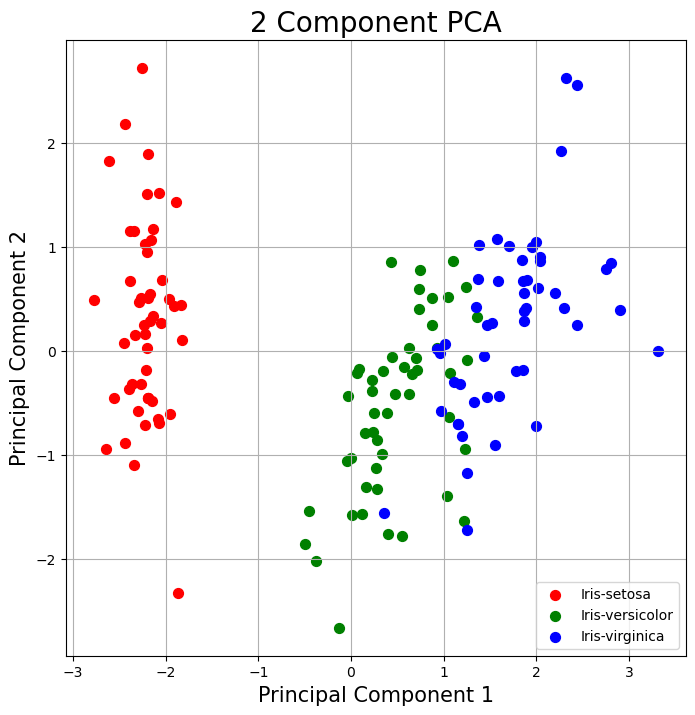

In [16]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


iris_targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(iris_targets,colors):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(iris_targets)
ax.grid()



iris-setosa is linearry separablo from others class

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
pca_iris.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

### limitations of PCA

* PCA is not scale invariant. check: we need to scale our data first.
    
* The directions with largest variance are assumed to be of the most interest

* Only considers orthogonal transformations (rotations) of the original variables
 
* PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

* If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.




### Exercises - Perform PCA for breast cancer dataset

* You can find this dataset it in the scikit learn library, import it and convert to pandas dataframe, original label are '0' and '1' for better readability change these names to: 'benign' and 'malignant'

In [84]:
# TODO
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
bc = pd.DataFrame(data.data, columns=data.feature_names)
y_bc = pd.Series(data.target).apply(lambda x: 'benign' if x==0 else 'malignat')

bc['target'] = pd.Categorical(y_bc)


In [85]:
bc.sample(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
551,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,28.26,77.80,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032,malignat
233,20.51,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,0.1448,0.05592,...,37.38,162.70,1872.0,0.1223,0.2761,0.4146,0.15630,0.2437,0.08328,benign
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.19410,0.2818,0.10050,benign
343,19.68,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,0.2082,0.05715,...,34.66,157.60,1540.0,0.1218,0.3458,0.4734,0.22550,0.4045,0.07918,benign
312,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,0.06140,...,16.40,92.04,618.8,0.1194,0.2208,0.1769,0.08411,0.2564,0.08253,malignat



* Visualizes correlations between pairs of features (due to the greater number of features use pandas corr () function instead of pairplot instead of seaborn heatmap ())

<AxesSubplot:>

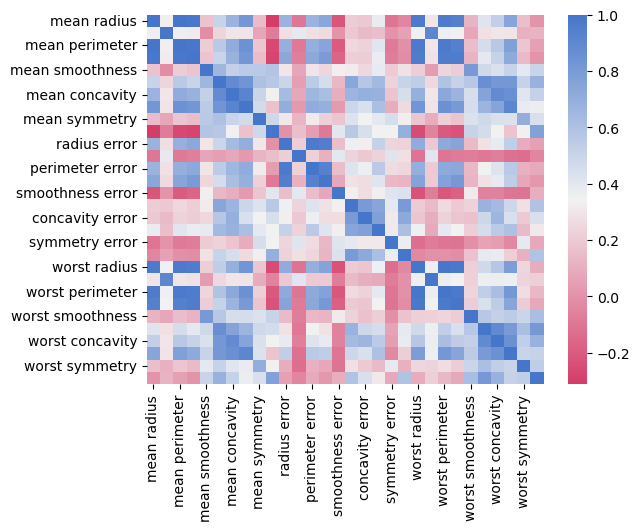

In [86]:
sns.heatmap(bc.corr(), cmap=sns.diverging_palette(0,255,as_cmap=True))

In [87]:
bc.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


* Perform PCA and visualize the data

In [88]:
pca = PCA(n_components=2)

In [89]:
bc_2d = pca.fit_transform(bc.drop('target', axis=1))

<AxesSubplot:>

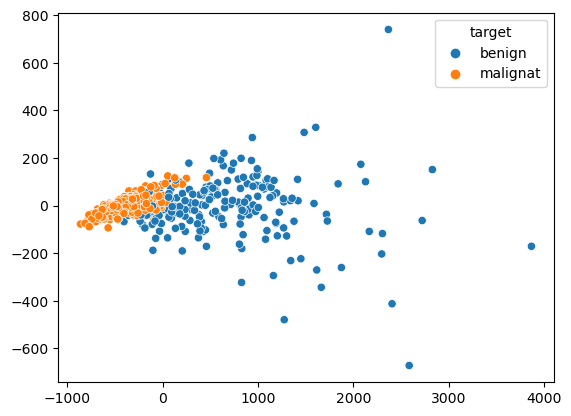

In [90]:
sns.scatterplot(x=bc_2d[:,0], y=bc_2d[:,1], hue=bc['target'] )

<AxesSubplot:>

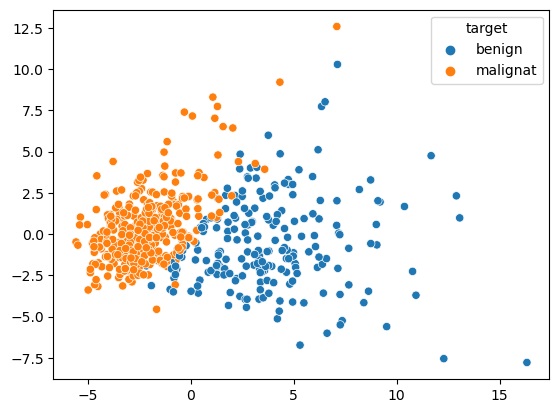

In [91]:
scaler = StandardScaler()
X_bc = scaler.fit_transform(bc.drop('target',axis=1))
pca = PCA(n_components=2)
bc_2d = pca.fit_transform(X_bc)
sns.scatterplot(x=bc_2d[:,0], y=bc_2d[:,1], hue=bc['target'] )

* Examine  explained variance, draw a plot showing relation between total explained variance and number of principal components used


In [117]:
pca_bc = PCA()
bc_ = pca_bc.fit_transform(X_bc)

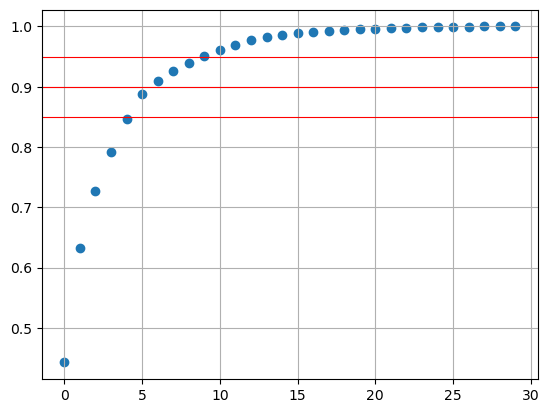

In [118]:
evr_bc = pca_bc.explained_variance_ratio_

plt.scatter(range(evr_bc.shape[0]), np.cumsum(evr_bc))
plt.axhline(y=0.95, color='r', linestyle='-', linewidth=0.8)
plt.axhline(y=0.90, color='r', linestyle='-', linewidth=0.8)
plt.axhline(y=0.85, color='r', linestyle='-', linewidth=0.8)
plt.grid(True)

* Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features to on 15 "more important" and "less important" features. Then repeat the last step from the full data set - draw a plot showing relation between total explained variance and number of principal components used for all 3 cases. Explain the result briefly.

In [119]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=15, step=1)
rfe.fit(X_bc, data.target)
rfe.support_

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True])

In [120]:
X_more_important = X_bc[:,rfe.support_]
X_less_important = X_bc[:,np.invert(rfe.support_)]

Text(0.5, 1.0, '15 less important features')

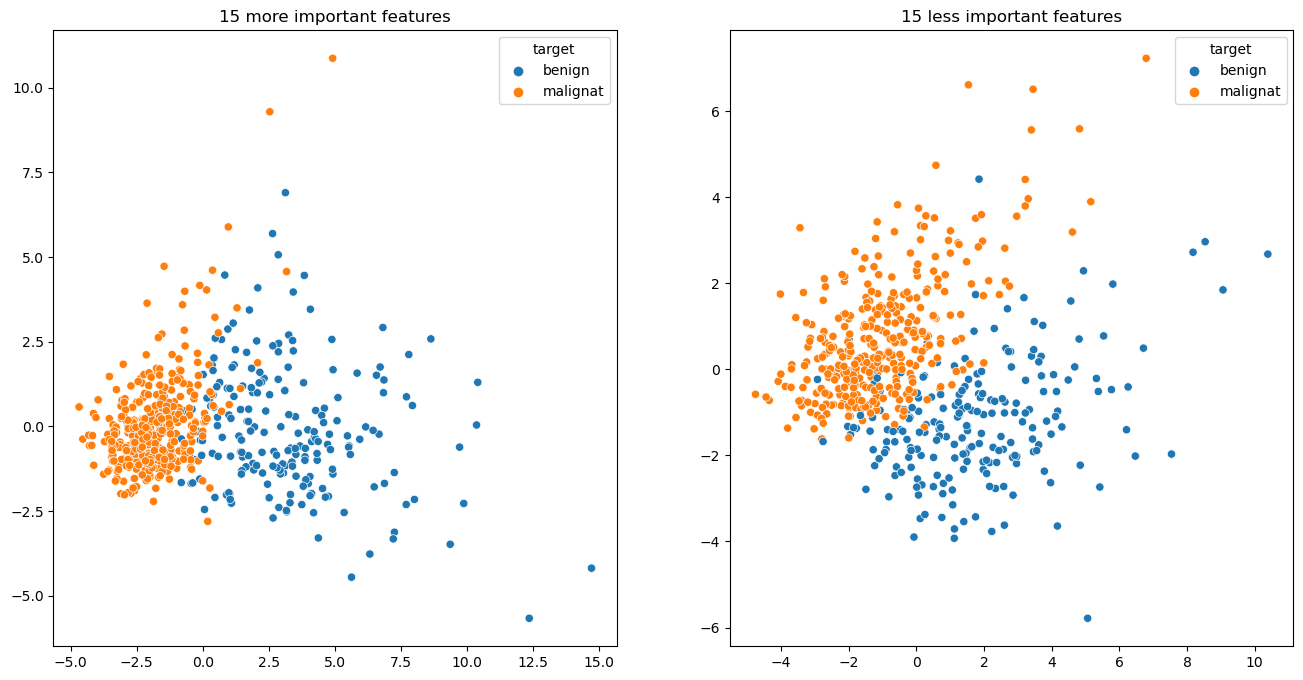

In [121]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
pca_more = PCA(n_components=2)
bc_more = pca_more.fit_transform(X_more_important)
sns.scatterplot(x=bc_more[:,0], y=bc_more[:,1], hue=bc['target'], ax=ax1)
ax1.set_title("15 more important features")


ax2 = fig.add_subplot(1,2,2) 
pca = PCA(n_components=2)
bc_less = pca.fit_transform(X_less_important)
sns.scatterplot(x=bc_less[:,0], y=bc_less[:,1], hue=bc['target'], ax=ax2)
ax2.set_title("15 less important features")


(0.4, 1.05)

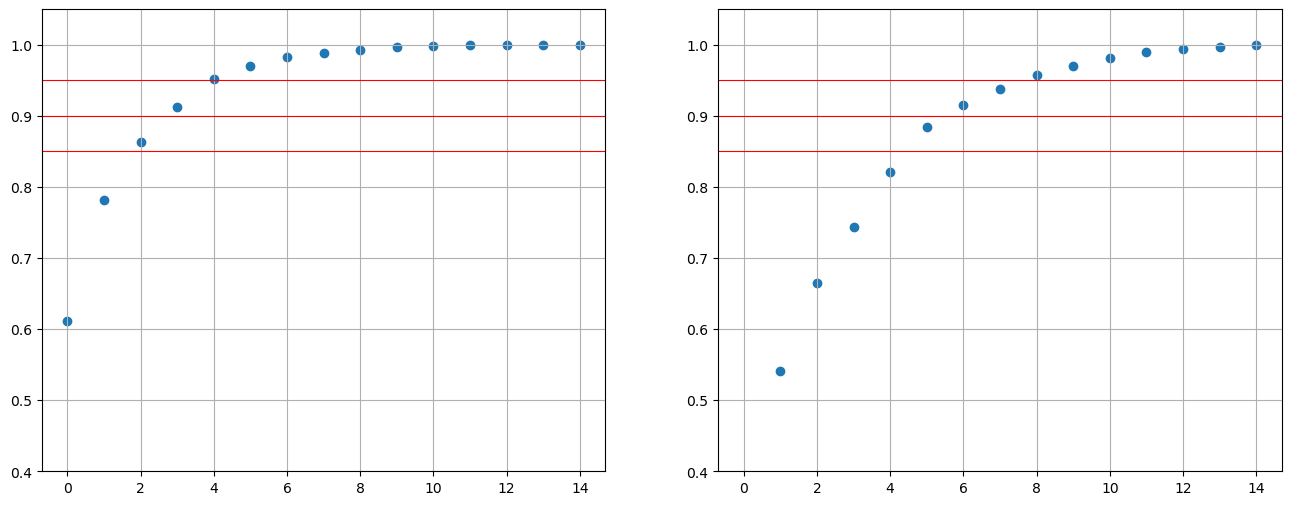

In [127]:
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
pca_bc_more = PCA()
bc_more = pca_bc_more.fit_transform(X_more_important)
evr_bc_more = pca_bc_more.explained_variance_ratio_

ax1.scatter(range(evr_bc_more.shape[0]), np.cumsum(evr_bc_more))
ax1.axhline(y=0.95, color='r', linestyle='-', linewidth=0.8)
ax1.axhline(y=0.90, color='r', linestyle='-', linewidth=0.8)
ax1.axhline(y=0.85, color='r', linestyle='-', linewidth=0.8)
ax1.grid(True)
ax1.set_ylim((0.4, 1.05))

pca_bc_less = PCA()
bc_less = pca_bc_less.fit_transform(X_less_important)
evr_bc_less = pca_bc_less.explained_variance_ratio_

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(range(evr_bc_less.shape[0]), np.cumsum(evr_bc_less))
ax2.axhline(y=0.95, color='r', linestyle='-', linewidth=0.8)
ax2.axhline(y=0.90, color='r', linestyle='-', linewidth=0.8)
ax2.axhline(y=0.85, color='r', linestyle='-', linewidth=0.8)
ax2.grid(True)
ax2.set_ylim((0.4, 1.05))


## Kernel PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

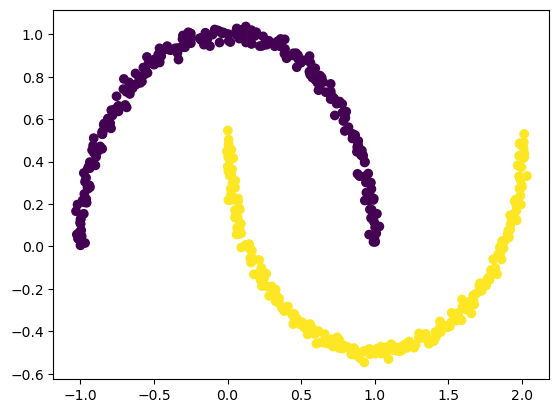

In [128]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons 
  
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show() 


Let’s apply PCA on this dataset

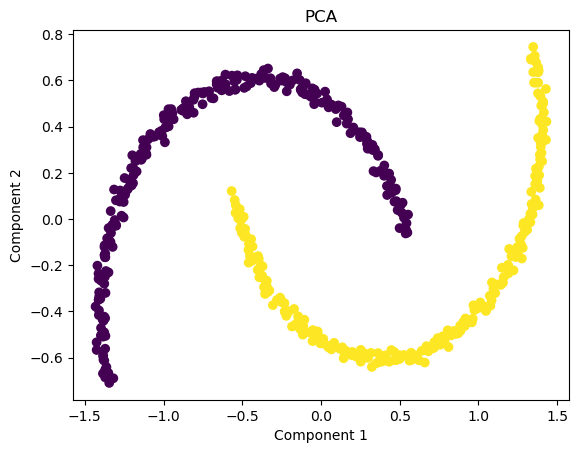

In [129]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("PCA") 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

PCA failed to distinguish the two classes

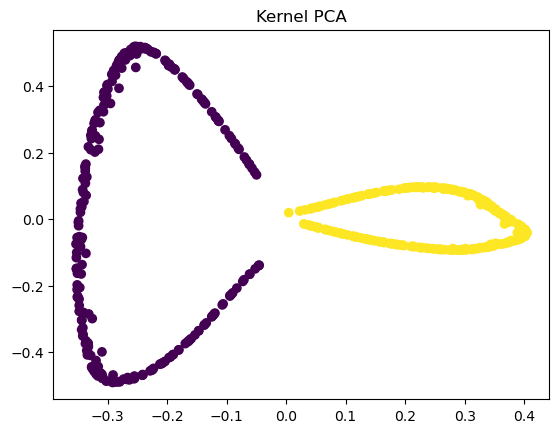

In [130]:
from sklearn.decomposition import KernelPCA 
kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 
  
plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 


Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15


### KernelPCA exercises

* Visualize in 2d datasets used in this labs, experiment with the parameters of the KernelPCA method change kernel and gamma params. Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html 

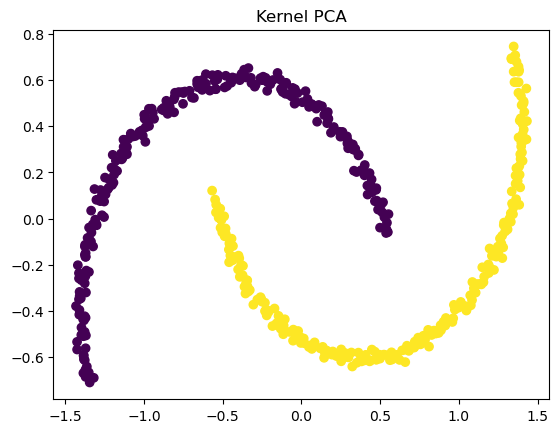

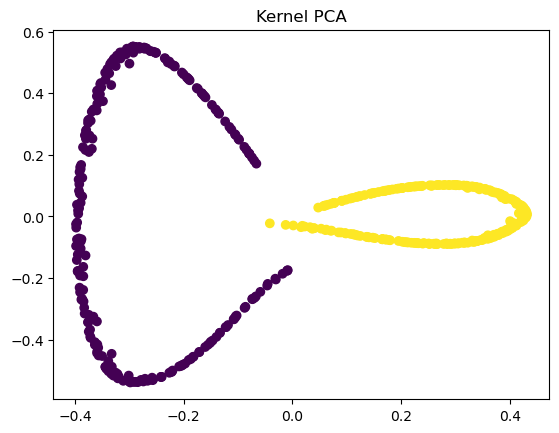

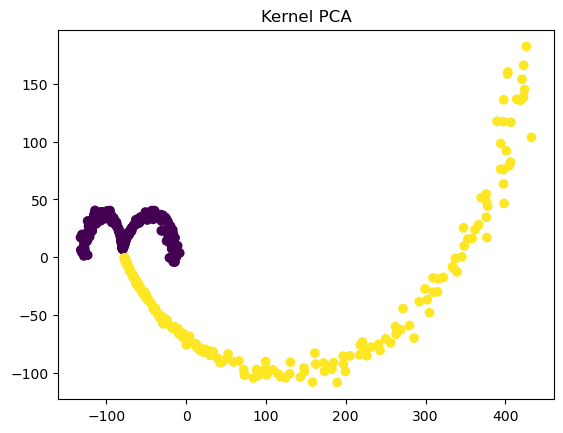

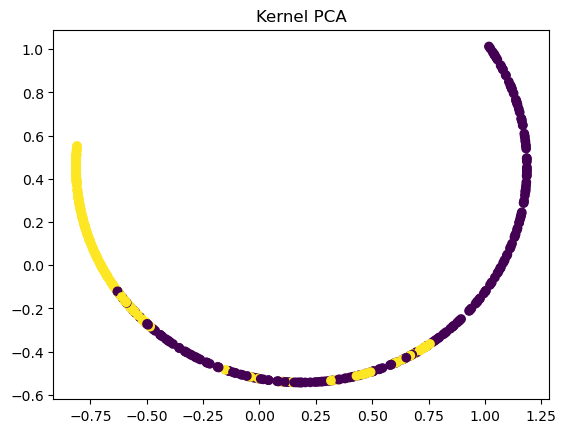

In [138]:

for kernel, gamma in zip(['linear', 'rbf', 'poly', 'cosine'], [5, 10, 15, 20]):
    kpca2 = KernelPCA(kernel =kernel, gamma = gamma) 
    X_kpca2 = kpca2.fit_transform(X) 
    plt.title("Kernel PCA") 
    plt.scatter(X_kpca2[:, 0], X_kpca2[:, 1], c = y) 
    plt.show() 

In [30]:
# TODO

## Homework

* Download the MNIST data set (there is a function to load this set in libraries such as scikit-learn, keras). It is a collection of black and white photos of handwritten digits with a resolution of 28x28 pixels. which together gives 784 dimensions.

* Try to visualize this dataset using PCA and KernelPCA, don't expect full separation of the data

* Similar to the exercises, examine explained variance. draw explained variance vs number of principal Components plot.

* Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.

* Draw some sample MNIST digits and from PCA of its images transform data back to its original space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform). Make an inverse transformation for number of components coresponding with explained variance shown above and draw the reconstructed images. The idea of this exercise is to see visually how depending on the number of components some information is lost.

* Perform the same reconstruction using KernelPCA (make comparisons for the same components number)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform


## Useful links
https://scikit-learn.org
https://towardsdatascience.com/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57
https://towardsdatascience.com/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64